In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Feature selection

## 1. Filter feature selection methods

### 1.1 Variance Threshold
Variance threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [1]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
selector = VarianceThreshold(threshold=(0.8*(1-0.8)))
X_new = selector.fit_transform(X)
X_new

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

**Expamle: Remove columns that have a low variance**

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


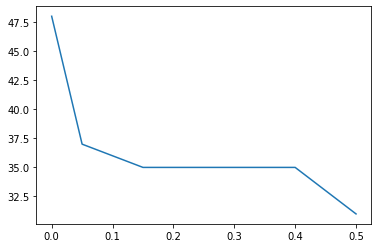

In [2]:
from matplotlib import pyplot
from pandas import read_csv
from numpy import arange
from sklearn.feature_selection import VarianceThreshold 

df = read_csv('../tyzden-04/data/oil-spill.csv', header=None)
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

thresholds = arange(0.0, 0.55, 0.05)
results = list()
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features)) 
    results.append(n_features)

# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)

### 1.2 Mutual Information, Chi-Squared and F-value

**Mutual information $MI$**

- Mutual information $MI$ between two random variables is a non-negative value, which measures the dependency between the variables. 
- It is equal to zero if and only if two random variables are independent
- Higher values mean higher dependency.

The concept of $MI$ is linked to information theory and **information entropy** ($\mathcal{H}$). The concept of $MI$ is linked to information theory and **information entropy** ($\mathcal{H}$). The unit of information depends on the base of the logarithm. If the base is 2, the most used, then the information is measured in *bits*. **MI is non-negative and symmetric.**

#### $\mathcal{H}(X) = - \int dx~\mu(x)~log\mu(x)$
#### $I(X, Y) = - \int \int dx~dy~\mu(x, y)~log \frac{\mu(x,y)}{\mu_x(x)~\mu_y(y)}$

For discrete variables,  $H(X)$ is calculated as:
#### $H(X) = -\sum_i P(x_{i}) log P(x_{i})$

MI can be equivalently expressed as the amount of uncertainty in $X$ minus the amount of uncertainty in $X$ after $Y$ is known, denoted as

#### $I(X; Y)= H(X)- H(X|Y)$

The entropy of $X$ after observing values of $Y$ is formulated by
#### $H(X|Y) = -\sum_{\substack{j}} P(y_{j}) \sum_{\substack{i}}P(x_{i}|y_{j})\log_2{P(x_{i}|y_{j})}$

where 
- $P(x_i)$ is the prior probabilities for all values of $X$ and 
- $P(x_i|y_i)$ is the posterior probabilities of $X$ given the values of $Y$. 

URL https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/information-theory.html

**Chi-Squared statistics**

### $\chi^2_{df} = \sum \frac{(X_i - Y_i)^2}{Y_i}$
where:
- $df$ = Degrees of freedom
- $X$ = Observed value(s)
- $Y$ = Expected value(s)

URL https://www.investopedia.com/terms/c/chi-square-statistic.asp

**(ANOVA) F-value**
The correlation between each regressor and the target is computed by

## $F_{value} = \frac{variance_{dataset_1}}{variance_{dataset_2}} = \frac{\sigma_1^2}{\sigma_2^2}$

It is converted to an F score then to a p-value.

In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

X, y = load_iris(return_X_y=True)
print(X.shape)

X_new = X_new = SelectKBest(mutual_info_regression, k=2).fit_transform(X, y)
# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
# X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)

print(X_new.shape)

(150, 4)
(150, 2)


## 2. Wrapper feature selection methods

### 2.1 Recursive feature elimination (RFE)
- First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a *coef_* attribute or through a *feature_importances_* attribute. 
- Then, the least important features are pruned from current set of features. 
- That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

URL https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [4]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


### 2.2 Feature selection using SelectFromModel

Meta-transformer for selecting features based on importance weights. The used model is usually some simple one.

URL https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

#### Model = LogisticRegression

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],
     [-2.79, -0.02, -0.85 ],
     [-1.34, -0.48, -2.55 ],
     [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]

selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())

X_new = selector.transform(X)
print(X_new.shape)
X_new

[[-0.3252302   0.83462377  0.49750423]]
0.5524527319086915
[False  True False]
(4, 1)


array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])

#### L1-based feature selection

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
print(X.shape)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
selector = SelectFromModel(estimator=lsvc, prefit=True)
print(selector.get_support())

X_new = selector.transform(X)
print(X_new.shape)